# Сборный проект — 2




**Описание проекта** 

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.


Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 


Поставлено несколько задач. 

Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.


Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Описание данных**

Данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


**Ход исследования в проекте:**

[**Первая задача**](#section_id): модель, которая сможет предсказать уровень удовлетворённости сотрудника.




- [Загрузка и изучение данных](#section_id1): общая информация о датасетах, опредение соответствуют ли данные описанию задачи и стандартам оформления данных. 
- [Предобработка данных](#section_id2): обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- [Исследовательский анализ данных](#section_id3): статистический анализ всех признаков, графики для каждого признака, их распределения, зависимости, а также выявление аномалий.
- [Корреляционный анализ](#section_id4): проведение корреляционного анализа признаков в количественной шкале в итоговой таблице для моделирования, выводы о наличии или об отсутствии мультиколлинеарности.
- [Подготовка данных для обучения](#section_id5): создание пайплайнов для подготовки данных, отбор признаков.
- [Обучение моделей](#section_id6): создание пользовательской метрики, обучение двух разных моделей, выбор лучшей на основании лучшего показателя пользовательской метрики.
- [Вывод по задаче 1](#section_id7): что сделали для поиска лучшей модели, как она может помочь бизнесу.


[**Вторая задача**](#section_id9): предсказание увольнения сотрудника из компании.

- [Загрузка и изучение данных](#section_id10): общая информация о датасетах, опредение соответствуют ли данные описанию задачи и стандартам оформления данных. 
- [Предобработка данных](#section_id11): обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- [Исследовательский анализ данных](#section_id12): исследовательский анализ данных, портрет «уволившегося сотрудника», визуализация и сравнение распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников.
- [Добавление нового входного признака](#section_id13): добавление признака job_satisfaction_rate для ушедших и оставшихся сотрудников.
- [Корреляционный анализ](#section_id14): проведение корреляционного анализа признаков в количественной шкале в итоговой таблице для моделирования, выводы о наличии или об отсутствии мультиколлинеарности.
- [Подготовка данных для обучения](#section_id15): создание пайплайнов для подготовки данных, отбор признаков.
- [Обучение моделей](#section_id16): oбучение как минимум трех моделей. Проверка качества лучшей модели.
- [Вывод по задаче 2](#section_id17): что сделали для поиска лучшей модели, как она может помочь бизнесу.



[**Общий вывод**](#section_id18): описание задачи, этапы работы, предложения для бизнеса.


<a id='section_id'></a>
## Первая задача.

<a id='section_id1'></a>
### Загрузка и изучение данных.

Импортируем необходимые библиотеки. Далее выведем общую информацию о датасете, посмотрим первые пять строк для понимания структуры данных.

In [441]:
!pip install -Uq scikit-learn

In [442]:
pip install missingno -q

Note: you may need to restart the kernel to use updated packages.


In [443]:
!pip install phik -q

In [444]:
!pip install shap -q

In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as msno
import math
import scipy.stats as st

from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.preprocessing import (
    OneHotEncoder, OrdinalEncoder, RobustScaler,
    StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
)
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error, 
    accuracy_score, confusion_matrix, recall_score, 
    precision_score, roc_auc_score, make_scorer 
)


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from phik.report import correlation_report, plot_correlation_matrix


import shap

In [446]:
pd.set_option('display.max_columns', None)

Загрузим датасеты.

In [447]:
# Тренировочная выборка по удовлетворенности работой.
satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')

In [448]:
# Входные признаки тестовой выборки
X_test_reg = pd.read_csv('/datasets/test_features.csv')

In [449]:
# Целевой признак тестовой выборки
y_test_reg = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

Изучим общую информацию и выведем первые пять строк для каждого датасета.

In [450]:
satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [451]:
X_test_reg.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [452]:
y_test_reg.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Замечаем, что в X_test_reg и y_test_reg порядок срок не соотвествует друг другу. В первых пяти строках совершенно разные id сотрудника, в y_test данные перемешаны. Объединим данные в одну таблицу по id, чтобы упорядочить. 

In [453]:
X_test_reg = X_test_reg.merge(y_test_reg, on='id')

In [454]:
y_test_reg = X_test_reg[['id','job_satisfaction_rate']]

In [455]:
X_test_reg = X_test_reg.drop('job_satisfaction_rate', axis=1)

In [456]:
X_test_reg.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [457]:
y_test_reg.head()

,id,job_satisfaction_rate
0,485046,0.79
1,686555,0.72
2,467458,0.64
3,418655,0.60
4,789145,0.75


Теперь данные упорядочены.

**Промежуточный вывод**

Загрузили три датасета, необходимых для построения модели машинного обучения. Посмотрели на структуру данных, убедились, что названия столбцов соответствуют общепринятым стандартам. Упорядочили записи по id в тестовой выборке с целевой переменной.

<a id='section_id2'></a>
### Предобработка данных.

Создадим функцию для вывода общей информации, пропусках, дубликатах.

In [458]:
def general_info(x):
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    x.info()
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(x.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    print('')
    print('')
    display(x.duplicated().sum())
    print('------------- Визуализация пропусков -------------')
    print('')
    print('')
    msno.bar(x);

**Тренировочные данные.**

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
------------- Количество пустых значений в датафрейме -------------




id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




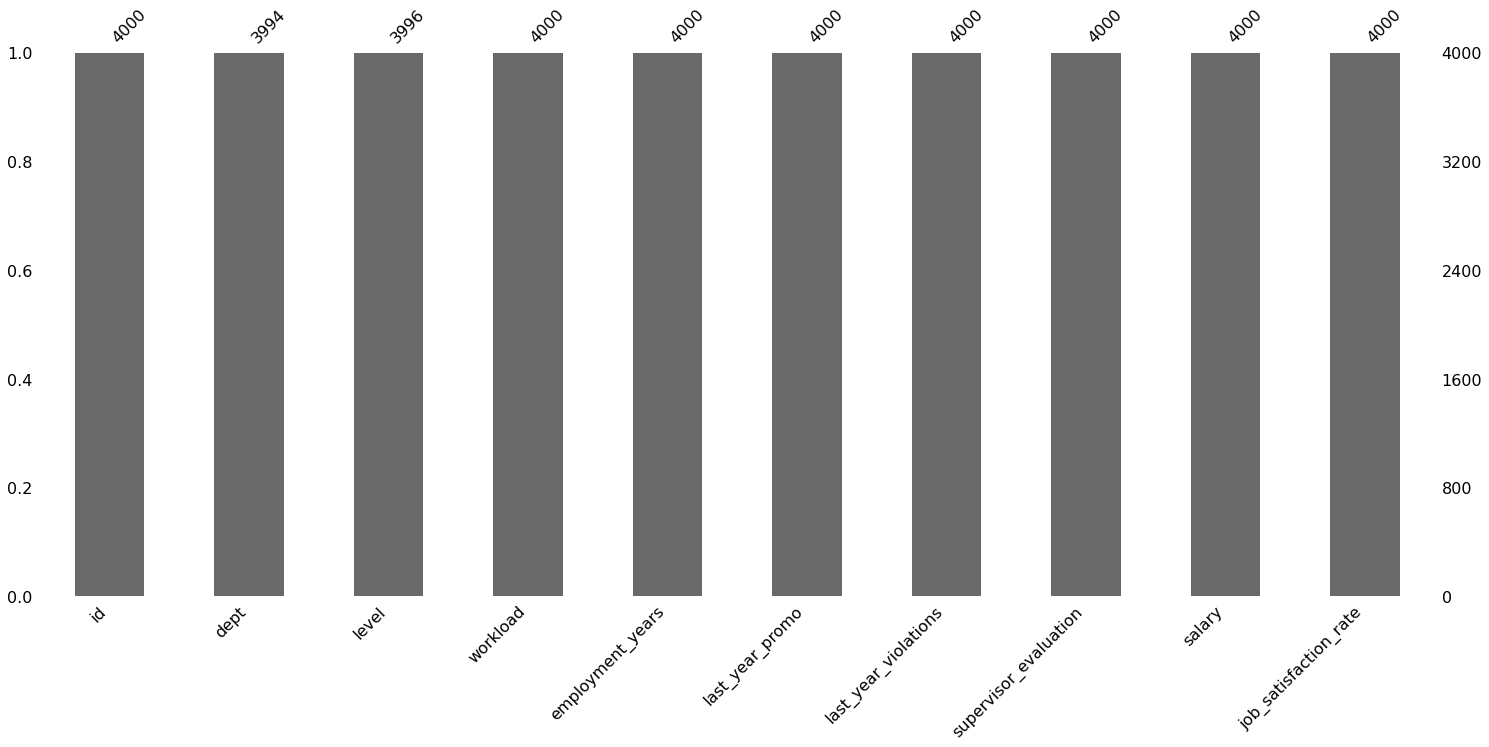

In [459]:
general_info(satisfaction_rate)

В тренировочной выборке типа данных соответствуют задачам, отсутствуют явные дубликаты, но есть пропущенные значения в столбце департамент и уровень занимаемой должности.

Для начала посмотрим на уникальные значения в обоих столбцах.

In [460]:
satisfaction_rate['dept'].value_counts()

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

In [461]:
satisfaction_rate['level'].value_counts()

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

Эти пропуски мы заполним наиболее часто встречающимися значениями для каждой категории на этапе подготовки и кодирования данных для обучения с помощью пайплайна.

**Тестовые входящие признаки.**

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 156.2+ KB
------------- Количество пустых значений в датафрейме -------------




id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




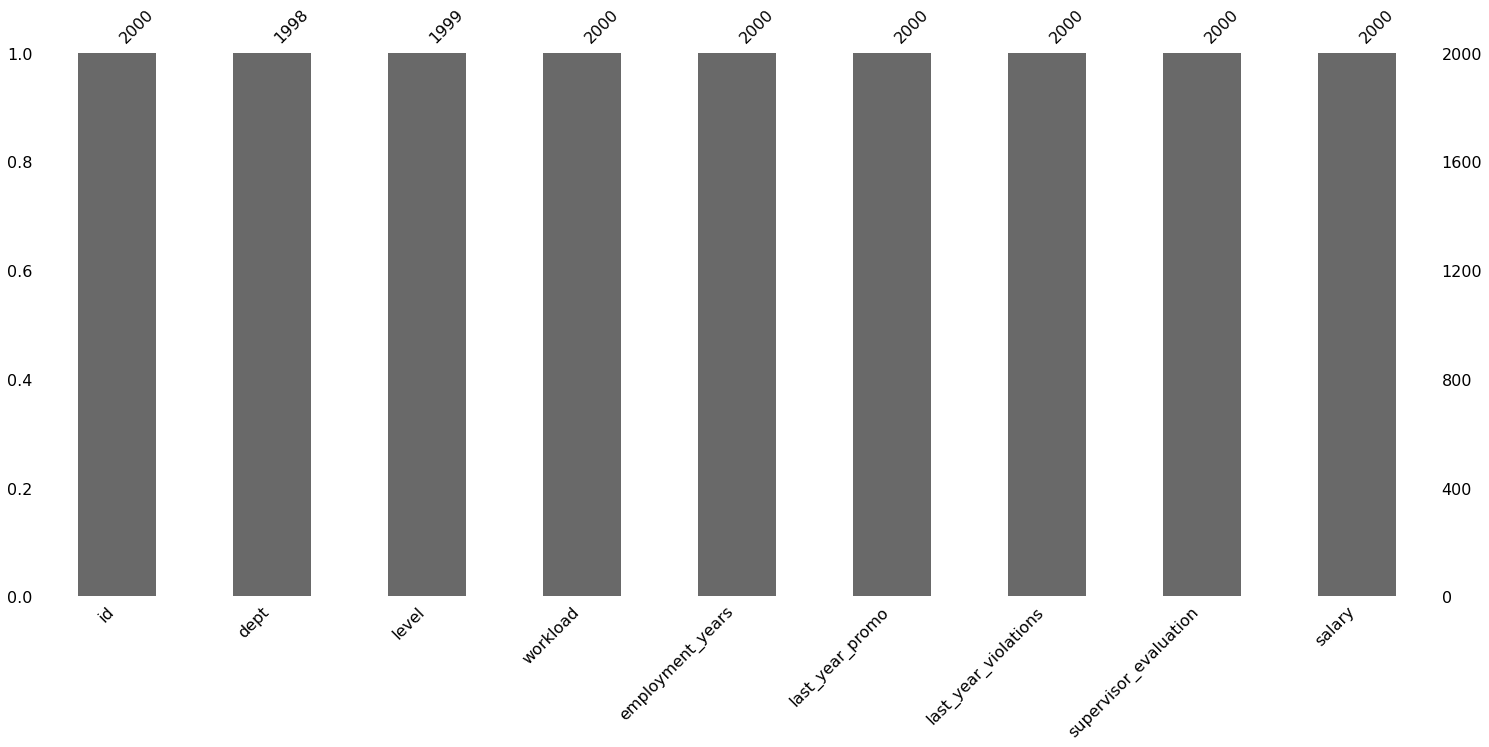

In [462]:
general_info(X_test_reg)

Видим, что в тестовой выборке входящих признаков также имеются пропуски в столбце департамент и уровень занимаемой должности. Посмотрим на эти данные.

In [463]:
X_test_reg[X_test_reg.isnull().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


Из 2000 строк у нас отсутствует три значения. Эти пропуски заполним при подготовке данных через пайплайн.

**Тестовая целевая переменная**

In [464]:
y_test_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 46.9 KB


Создадим функцию для проверки неявных дубликатов.

In [465]:
def duplicates(data):
    cat_features = data.select_dtypes(include=['object']).columns
    for i in cat_features:
        print(f'Уникальные значения в столбце {i}: ', data[i].unique())

In [466]:
# Тренировочные данные.
duplicates(satisfaction_rate)

Уникальные значения в столбце dept:  ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Уникальные значения в столбце level:  ['junior' 'middle' 'sinior' nan]
Уникальные значения в столбце workload:  ['medium' 'high' 'low']
Уникальные значения в столбце last_year_promo:  ['no' 'yes']
Уникальные значения в столбце last_year_violations:  ['no' 'yes']


In [467]:
# Тестовые входящие признаки
duplicates(X_test_reg)

Уникальные значения в столбце dept:  ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уникальные значения в столбце level:  ['junior' 'middle' 'sinior' nan]
Уникальные значения в столбце workload:  ['medium' 'low' 'high' ' ']
Уникальные значения в столбце last_year_promo:  ['no' 'yes']
Уникальные значения в столбце last_year_violations:  ['no' 'yes']


В тренировочной и тестовых выборках нет явных дубликатов. Значения переменных идентичны в обоих датасетах. В тестовой выборке в столбце workload и dept видим неявный пропуск. Отфильтруем данные по этому пропуску.

In [468]:
X_test_reg[X_test_reg['workload']==' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


Проделаем то же самое со столбцом dept.

In [469]:
X_test_reg[X_test_reg['dept']==' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


**Промежуточный вывод**

Изучена общая информация о каждом датасете, проверены пропуски и дубликаты. Были обнаружены пропуски в тренировочном и тестовом (входящие признаки) датасетах. Было принято решение в тренировочной выборке заполнить пропуски наиболее часто встречающимися значениями на этапе подготовки данных к обучению модели с помощью пайплайна. В тестовой же выборке было пять пропусков, три явных и два неявных. Эти пропуски мы также обработаем с помощью пайплайна.

<a id='section_id3'></a>
### Исследовательский анализ данных.

Создадим функцию для исследовательского анализа  датасетов.

In [470]:
def eda(data):
    print('------------- Описательная статистика для числовых данных -------------')
    display(data.describe().T)
    print('')
    print('')
    print('------------- Описательная статитстика для категориальных данных -------------')
    try:
        display(data.describe(include='object').T)
    except:
        print('В данных нет категориальных признаков')
    print('')
    print('')
    print('------------- Гистограммы для числовых признаков -------------')
    try:
        try:
            numeric_features = ['salary', 'job_satisfaction_rate']
            for i in numeric_features:
                plt.hist(data[i], bins=100)
                plt.grid(True) 
                plt.title(f'Распредение {i}', loc = 'left') 
                plt.xlabel(f'{i}') 
                plt.ylabel('Частота') 
                plt.xticks(rotation=45)
                plt.show()
        except:
            numeric_features = ['salary']
            for i in numeric_features:
                plt.hist(data[i], bins=100)
                plt.grid(True) 
                plt.title(f'Распредение {i}', loc = 'left') 
                plt.xlabel(f'{i}') 
                plt.ylabel('Частота') 
                plt.xticks(rotation=45)
                plt.show()
    except:
        pass
    print('')
    print('')
    print('------------- Распределения категориальных признаков -------------')
    try:
        cat_features = data.select_dtypes(include=['object']).columns
        for i in cat_features:
            plt.figure(figsize=(7, 5))
            sns.countplot(data=data, x=i, order=data[i].value_counts().index)
            plt.title(f'Распредение {i}', loc = 'left') 
            plt.xlabel(f'{i}') 
            plt.ylabel('Частота') 
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
        for i in ['employment_years', 'supervisor_evaluation']:
            sns.countplot(data=data, x=i, order=data[i].value_counts().index)
            plt.title(f'Распредение {i}', loc = 'left') 
            plt.xlabel(f'{i}') 
            plt.ylabel('Частота') 
            plt.xticks(rotation=45)
            plt.show()
    except:
        print('Категориальных признаков нет')

**Тренировочная выборка**

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
dept,3994,5,sales,1512
level,3996,3,junior,1894
workload,4000,3,medium,2066
last_year_promo,4000,2,no,3880
last_year_violations,4000,2,no,3441




------------- Гистограммы для числовых признаков -------------


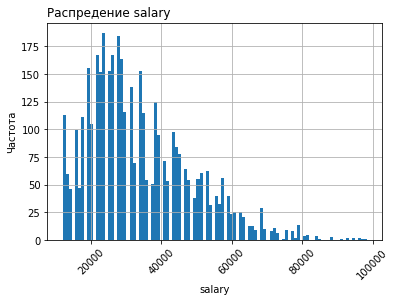

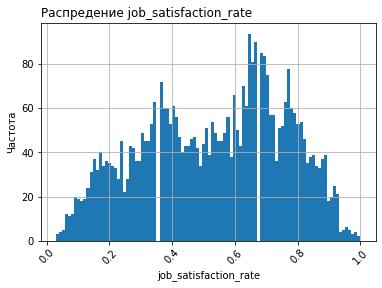



------------- Распределения категориальных признаков -------------


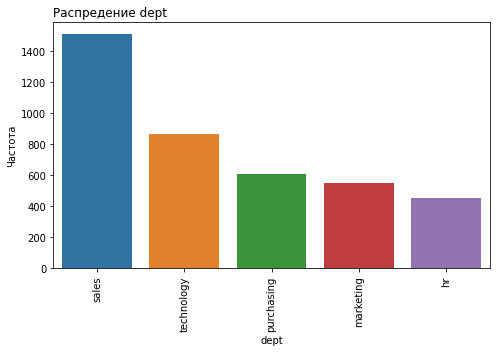

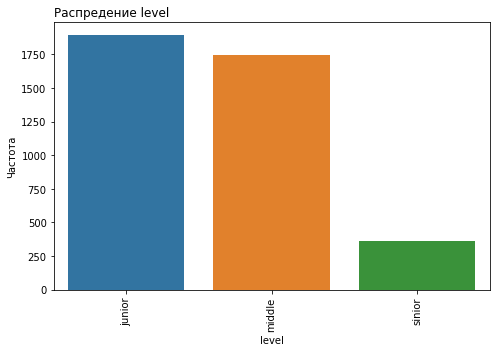

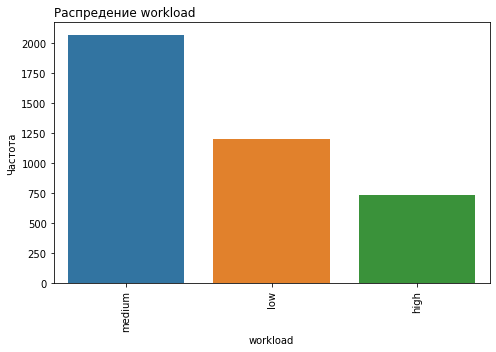

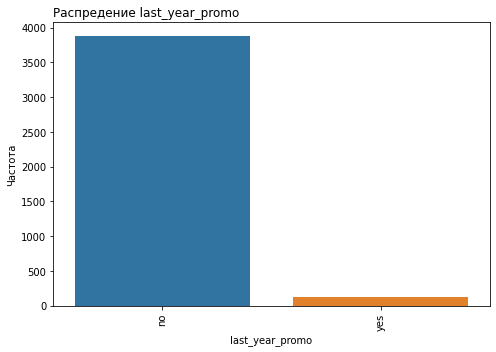

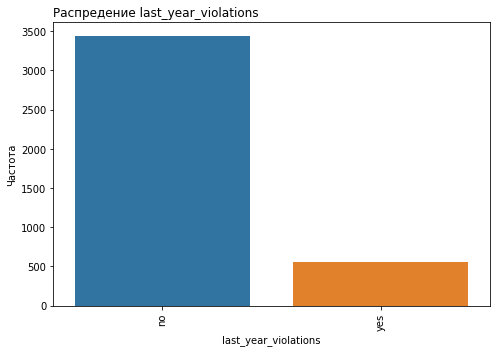

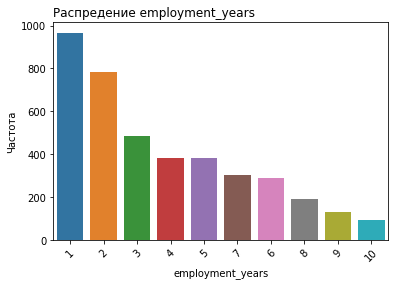

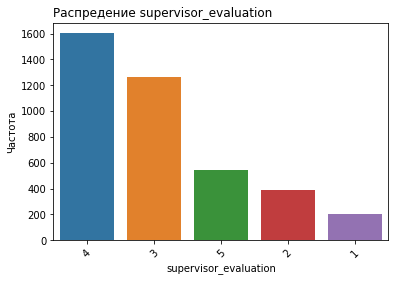

In [471]:
eda(satisfaction_rate)

Построим графики рассеяния для анализа зависимости целевой переменной от других численных признаков.

In [472]:
numeric_features = satisfaction_rate.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [473]:
numeric_features.remove('id')

In [474]:
numeric_features.remove('job_satisfaction_rate')

In [475]:
numeric_features

['employment_years', 'supervisor_evaluation', 'salary']

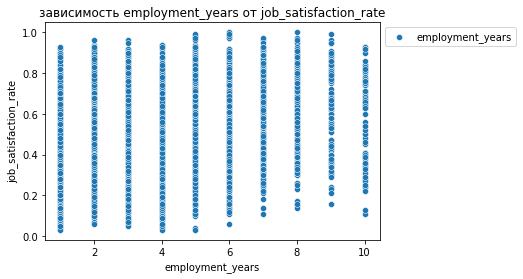

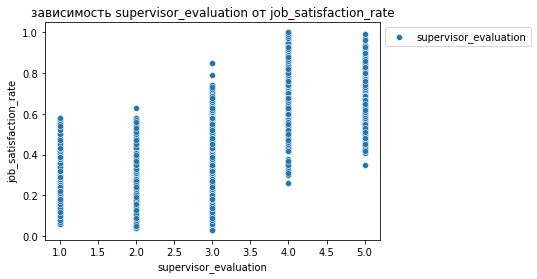

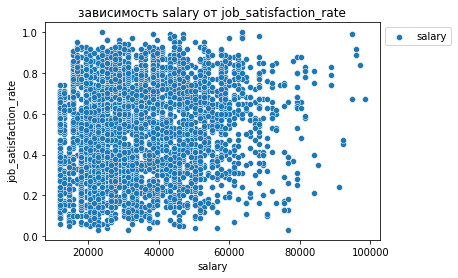

In [476]:
for i in numeric_features:
    sns.scatterplot(data=satisfaction_rate, x=i, y='job_satisfaction_rate', label=i)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    plt.title(f'зависимость {i} от job_satisfaction_rate')
    plt.xlabel(f'{i}')
    plt.ylabel('job_satisfaction_rate')           
    plt.show()

При исследовательском анализи увидели:
- чаще всего люди работают в компании всего год-два. Но есть также сотрудники, которые работаю долго 8-10 лет.
- чаще всего руководитель оценивает работу своих сотрудников хорошо, но тем не менее 25% работают на тройку.
- распределение по зарплате имеет длинный хвост вправо, что является нормальным, так как в каждой компании существует небольшое количество высокооплачиваемых специалистов. Медианная зарплата 33926.70 рублей.
- распределение уровня удовлетворенности работой имеет два пика, медианна 0.53.
- больше всего сотрудников трудится в отделе продаж.
- преобладают молодые начинающие сотрудники.
- больше всего сотрудников со средней загрузкой по работе.
- зарплату в прошлом году практически никому не повысили.
- сотрудники чаще не нарушают условия трудового договора.

Численные признаки не имеют линейной зависимости от таргета. Скорее всего модель не сможет найти хорошую зависимость. Поэтому после обучения первой модели и подсчета метрики качества, попробуем сделать feature engineering.

Также заметили, что есть большой дисбаланс по некоторым входящим признакам, например, у признака повышение зарплаты в прошлом году. Этот момент следует учесть при принятии решения на разбивку тренировочной выборки на тренировочную и валидационную, а также при обучении моделей. Возможно, этот признак нужно будет отбросить.

**Тестовая выборка с входящими признаками**

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
dept,1998,6,sales,763
level,1999,3,junior,974
workload,2000,4,medium,1043
last_year_promo,2000,2,no,1937
last_year_violations,2000,2,no,1738




------------- Гистограммы для числовых признаков -------------


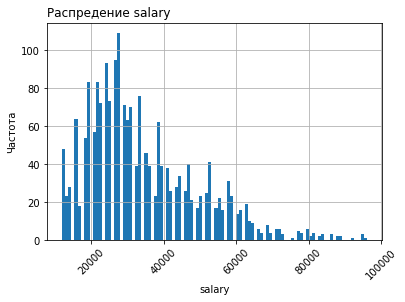

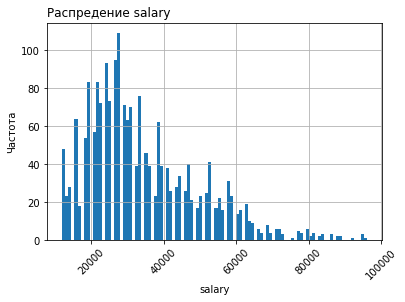



------------- Распределения категориальных признаков -------------


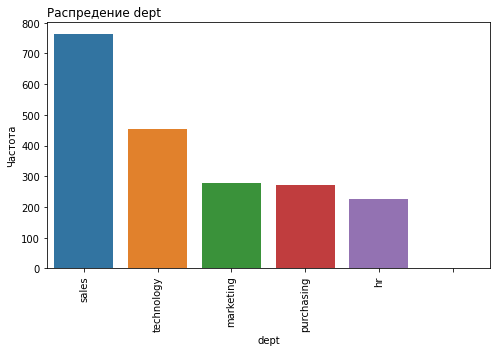

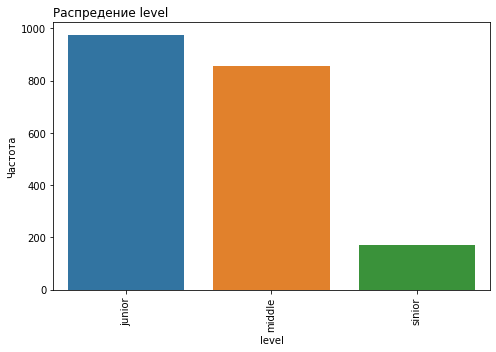

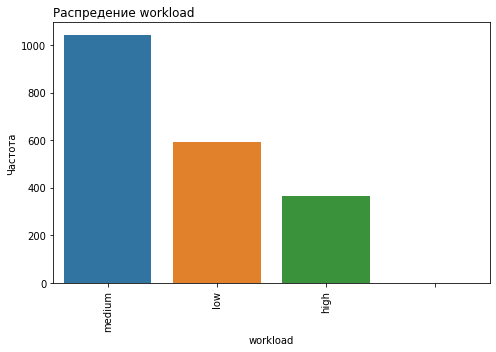

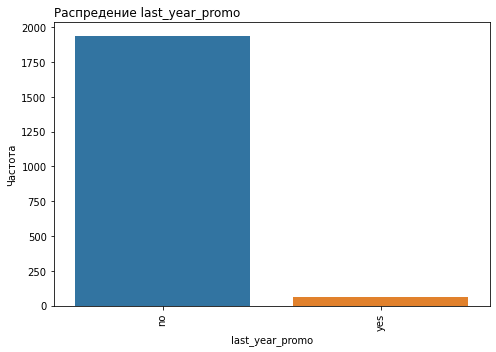

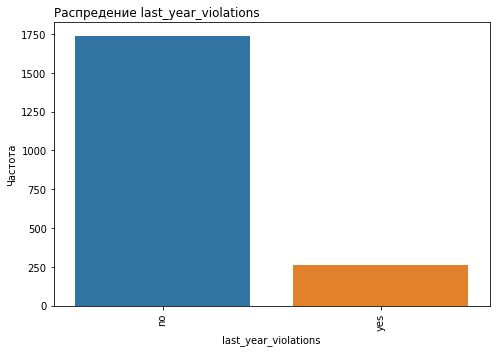

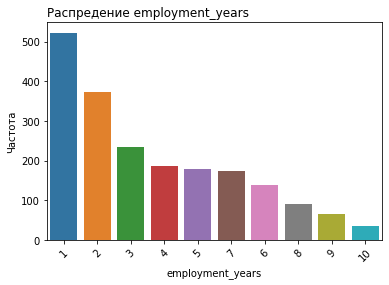

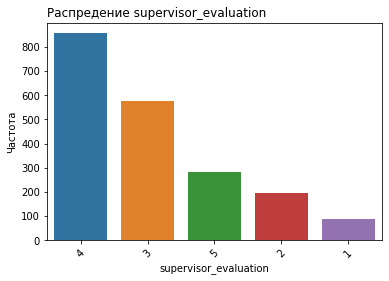

In [477]:
eda(X_test_reg)

Данные и их статистика идентичны тренировойной выборке.

**Тестовая выборка с целевым признаком**

In [478]:
y_test_reg.job_satisfaction_rate.describe()

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

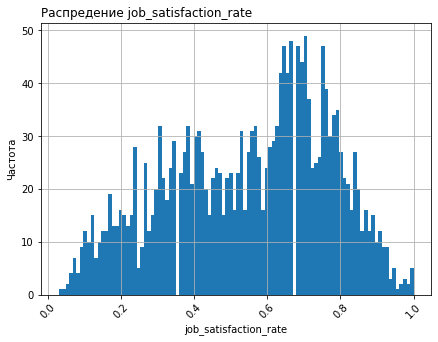

In [479]:
plt.figure(figsize=(7, 5))
plt.hist(y_test_reg.job_satisfaction_rate, bins=100)
plt.grid(True) 
plt.title(f'Распредение job_satisfaction_rate', loc = 'left') 
plt.xlabel('job_satisfaction_rate') 
plt.ylabel('Частота') 
plt.xticks(rotation=45)
plt.show()

Данные полностью соответствуют тренировочной выборке.

**Промежуточный вывод**

Провели исследовательский аналих представленных датасетов.

При исследовательском анализе всех представленных датасетов увидели:
- чаще всего люди работают в компании всего год-два. Но есть также сотрудники, которые работаю долго 8-10 лет.
- чаще всего руководитель оценивает работу своих сотрудников хорошо, но тем не менее 25% работают на тройку.
- распределение по зарплате имеет длинный хвост вправо, что является нормальным, так как это зарплаты руководства. Медианная зарплата 33926.70 рублей.
- распределение уровня удовлетворенности работой имеет два пика, медианна 0.53.
- больше всего сотрудников трудится в отделе продаж.
- преобладаюст молодые начинающие сотрудники.
- больше всего сотрудников со средней загрузкой по работе.
- зарплату в прошлом году практически никому не повысили.
- сотрудники чаще не нарушают условия трудового договора.

Также заметили, что есть большой дисбаланс по некоторым входящим признакам, например, у признака повышение зарплаты в прошлом году. Этот момент следует учесть при принятии решения на разбивку тренировочной выборки на тренировочную и валидационную, а также при обучении моделей.


В данных есть числовые и категориальные переменные. Категориальные переменные в свою очередь могут быть разбиты на два типа - ранговые для ord кодирования и обычные для ohe кодирования. 

Численные признаки не имеют линейной зависимости от таргета. Скорее всего модель не сможет найти хорошую зависимость. Поэтому после обучения первой модели и подсчета метрики качества, попробуем сделать feature engineering.



<a id='section_id4'></a>
### Корреляционный анализ.

Изучим взаимосвязь между признаками в тренировочном датасете, рассчитаем коэффициенты корреляции между всеми признаками.

In [480]:
# phik корреляция
interval_cols = ['salary', 'job_satisfaction_rate']

In [481]:
phik_overview = satisfaction_rate.phik_matrix(interval_cols=interval_cols)

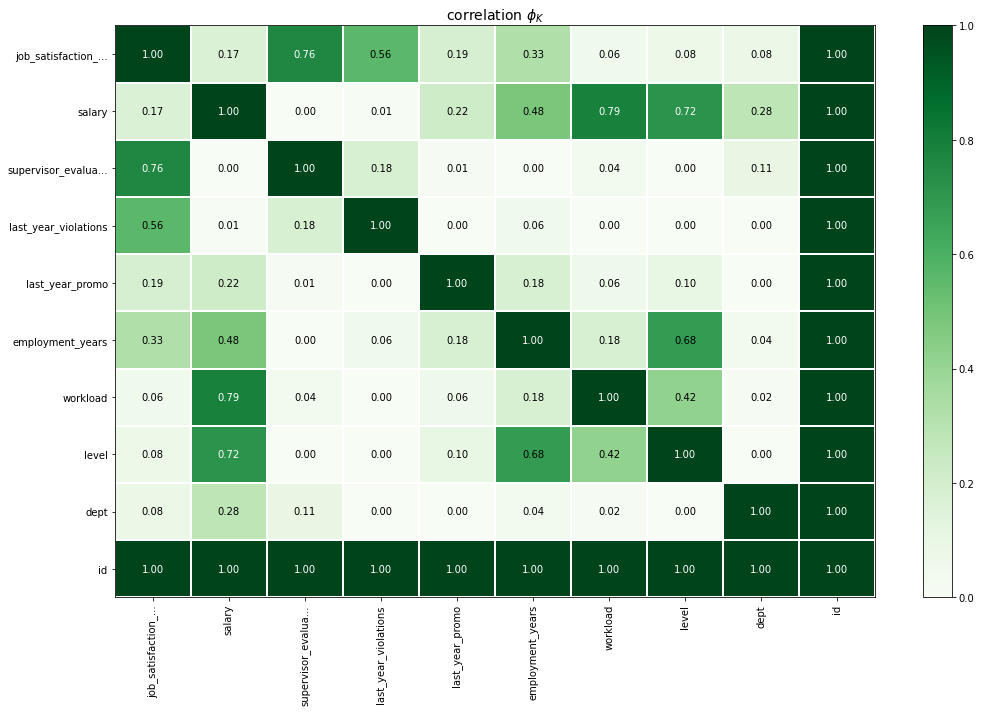

In [482]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(15, 10))

**Промежуточный вывод**

Построили матрицу корреляций признаков, из которой увидели, что больше всего коррелируют между собой уровень загрузки и зарплата. Но поскольку о мультиколлинеарности говорят при значении коэффициента по модулю от 0.9 до 0.95, то в нашем случае коэффициентов корреляции выше 0.9 не наблюдается. 

Целевая переменная - это удовлетворенность работой. Больше всего с ней коррелирует оценка работы руководителем и были ли нарушения трудового договора в прошлом году.


<a id='section_id5'></a>
### Подготовка данных.

Разобьем тренировочную выборку на входные признаки и целевую переменную.

In [483]:
X_train_reg = satisfaction_rate.drop(['id', 'job_satisfaction_rate'], axis=1)

In [484]:
y_train_reg = satisfaction_rate['job_satisfaction_rate']

In [485]:
y_test_reg = y_test_reg['job_satisfaction_rate']

Мы не будем дополнительно делать разбивку на тренировочную и валидационную выборки, так как во входящих признаках у нас есть большой дисбаланс по некоторым переменным, и соответственно какие-то значения несбаланисрованных признаком могут отсутствовать либо в тренировочной, либо в валидационной выборке. Напротив же изначально датасеты satisfaction_rate и X_test_reg репрезентативны. При исследовательском анализе видели, что все значения несбалансированных переменных присутствуют в обоих выборках. Например, и там, и там есть небольшая доля сотрудников, кому повысили зарплаты. Кроме того планируется использовать поиск по сетке с кросс-валидацией.

Подумаем стоит ли проводить отбор признаков для модели. Преимущества отбора признаков:

- снижение сложности модели, увеличение обобщающей способности
- ускорение обучения и инференса модели
- устранения «шума» в моделях
- митигирование рисков снижения качества переменных в ПРОМ, увеличение контроля над моделями

Обычно отбор признаков делают в следующей последовательности:

- удаление признаков с малой дисперсией, большим количеством пропусков
- оценка корреляции, удаление второстепенных переменных
- отбор по permutation importance / shap по порогу или топ-N
- удаление нестабильных по PSI переменных (опционально)
- оценка нужного количества фичей через forward / backward selection

В нашем датасете в принципе не так и много признаков, но тем не менее мы попробуем провести отбор.

В столбце было ли повышение зп в прошлом году был большой дисбаланс, и подавляющее большинство значений отрицательное. Попробуем визуализировать влияет ли фактор повышения зп на удовлетворенность работой. Чисто на интуитивном уровне это очевидно, что влияет. Но мы хотим точно убедиться. Если не влияет, то этот признак мы удалим, так как если в будущем ситуация поменяется (например, либо всем повысят, либо повысят только половине), то возможно модель плохо предскажет уровень удовлетворенности. Модель придется переобучивать.

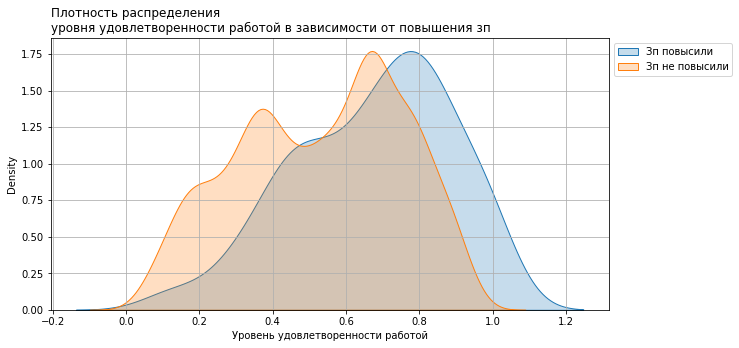

In [486]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(satisfaction_rate[satisfaction_rate['last_year_promo']=='yes'].job_satisfaction_rate, 
            label = 'Зп повысили', fill=True)
sns.kdeplot(satisfaction_rate[satisfaction_rate['last_year_promo']=='no'].job_satisfaction_rate, 
            label = 'Зп не повысили', fill=True)
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nуровня удовлетворенности работой в зависимости от повышения зп', loc = 'left') 
plt.xlabel('Уровень удовлетворенности работой') 


plt.show()

Из графиков видим, что наша интуиция подтвердилась. Сотрудники, которым повысили зп, все-таки более довольны работой.
Этот признак мы оставляем. 

Создадим списки для ohe, ord и scaler. Вначале попробуем все числовые признаки оставить числовыми. Мы понимаем, что оценка руководителя явно ранговая переменная. Но ради экперимента и для обучения baseline модели сделаем простую комбинацию.

In [487]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

In [488]:
ord_columns = ['level', 'workload']

In [489]:
num_columns = X_train_reg.select_dtypes(include=['number']).columns.tolist()

Создадим пайплайны для обработки данных, затем объединим их в препроцессор, который в свою очередь включим в итоговый пайплайн.

In [490]:
# Cоздаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование, SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# Cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование, 
# SimpleImputer + OE.
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


# Создаем пайплайн для подготовки данных к обучению.
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


# Cоздаём итоговый пайплайн: подготовка данных и модель.
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=42))
    ]
) 

**Промежуточный вывод**

Проанализировали стоит ли проводить отбор признаков.
Создали списки признаков для кодировщиков. Подготовили data preprocessor. Перед поиском по сетке создадим свою пользовательскую метрику.

<a id='section_id6'></a>
### Обучение моделей.

Обучим как минимум две модели. Возьмем одну линейную модель, а в качестве второй — дерево решений. Подберем гиперпараметры.
Выберем лучшую модель и проверим её качество. Выбор будет делаться на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 


Для начала создадим пользовательскую метрику.

In [491]:
def smape(y_true, y_pred):
    n = len(y_true)
    metric = (100 / n) * np.sum((np.abs(y_true - y_pred)) / ((np.abs(y_true) + np.abs(y_pred)) / 2))
    return metric                         


In [492]:
scorer = make_scorer(smape, greater_is_better=False )

In [493]:
scorer

make_scorer(smape, greater_is_better=False, response_method='predict')

Создаем список параметров для поиска по сетке для разных моделей.

In [494]:
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(2, 7),
       'models__criterion': ['squared_error', 'absolute_error'],
      'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
        
    },
    
   # словарь для модели ElasticNet()
    {
        'models': [ElasticNet(random_state=42)],
        'models__l1_ratio': [.1, .5, .7,.9, .95, .99, 1],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


Создаем объект класса случайного поиска по сетке. В качестве метрики передадим нашу пользовательскую метрику. 

Метрика SMAPE (симметричная средняя абсолютная процентная ошибка) хороша тем, что позволяет корректно работать с предсказанными значениями, независимо от того, больше они фактического значения или меньше. 

Некоторые другие преимущества SMAPE:

Балансировка вклада ошибок. SMAPE уменьшает чувствительность к малым значениям, используя среднее значение истинного и прогнозируемого значений в знаменателе.  
Справедливость оценки. SMAPE обеспечивает более симметричный взгляд на ошибки, учитывая, что и переоценка, и недооценка одинаково влияют на конечный результат.  
Полезность при работе с данными, включающими нулевые или очень маленькие значения, а также когда различия в масштабах между истинными и прогнозируемыми значениями могут существенно исказить результаты оценки.  
SMAPE помогает определить, насколько близки модели прогнозирования к фактическим результатам данных. Например, значение 2% означает, что разница между методами прогнозирования и полученными реальными данными относительно невелика. Высокий показатель SMAPE, например 53%, означает, что можно улучшить модели прогнозирования, чтобы сделать их более точными.

In [495]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scorer,
    random_state=42,
    n_jobs=-1
)

Обучим модель.

In [496]:
randomized_search.fit(X_train_reg, y_train_reg)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__max_depth': range(2, 7),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [ElasticNet(random_state=42)],
                                         'models__l1_ratio': [0.1, 0.5, 0.7,
                                                              0.9, 0.95, 0.99,
                                                              1],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [497]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [498]:
print ('Результат метрики на кросс-валидации:', -randomized_search.best_score_)

Результат метрики на кросс-валидации: 18.638374203580074


In [499]:
# Предсказание лучшей модели.
y_pred_reg = randomized_search.predict(X_test_reg) 

In [500]:
print ('Метрика лучшей модели на тестовой выборке:', smape(y_test_reg, y_pred_reg))

Метрика лучшей модели на тестовой выборке: 17.830541215676288


Попробуем улучшить метрику. Поэтому попробуем поработать с гиперпараметрами дерева и признаками выборки.

Визуализируем остатки предсказания модели. Возможно мы сможем выявить какие-то скрытые зависимости в данных.

In [501]:
#вычислим остатки модели
residuals = y_test_reg - y_pred_reg

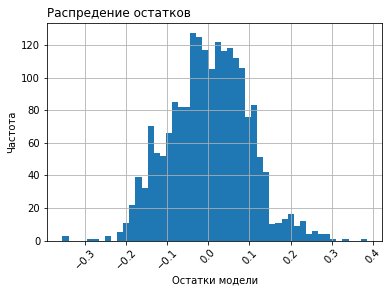

In [502]:
#визуализация остатков
plt.hist(residuals , bins=50)
plt.grid(True) 
plt.title('Распредение остатков', loc = 'left') 
plt.xlabel('Остатки модели') 
plt.ylabel('Частота') 
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

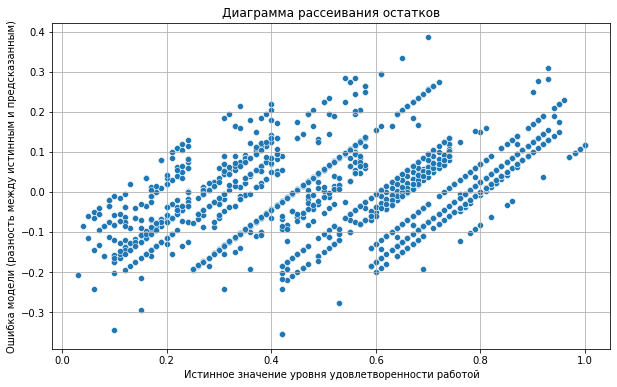

In [503]:
#scater plot по оси Х предсказанные моделью значения, по оси У остатки.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=residuals)
plt.title('Диаграмма рассеивания остатков')
plt.xlabel('Истинное значение уровня удовлетворенности работой')
plt.ylabel('Ошибка модели (разность между истинным и предсказанным)')
plt.grid(True)
plt.show()

Из графиков делаем вывод, что в данных нет линейных зависимостей, так как остатки не распределены равномерным случайным образом. 

Попробуем разбить зарплату на бины. А год работы и оценку работы руководителя передать в ohe и ord кодировщики.

<AxesSubplot:>

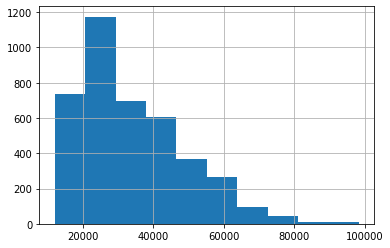

In [504]:
satisfaction_rate['salary'].hist()

In [505]:
# Бины для зарплаты.
cut_labels = ['low', 'middle','middle-high', 'high']
cut_bins = [0, 20000, 40000, 60000, 1000000]

satisfaction_rate['salary_cat'] = pd.cut(satisfaction_rate['salary'],
                       bins=cut_bins,
                       labels=cut_labels)
satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,salary_cat
0,155278,sales,junior,medium,2,no,no,1,24000,0.58,middle
1,653870,hr,junior,high,2,no,no,5,38400,0.76,middle
2,184592,sales,junior,low,1,no,no,2,12000,0.11,low
3,171431,technology,junior,low,4,no,no,2,18000,0.37,low
4,693419,hr,junior,medium,1,no,no,3,22800,0.20,middle


Подготовим тестовую выборку.

In [506]:
# Бины для зарплаты.
cut_labels = ['low', 'middle','middle-high', 'high']
cut_bins = [0, 20000, 40000, 60000, 1000000]

X_test_reg['salary_cat'] = pd.cut(X_test_reg['salary'],
                       bins=cut_bins,
                       labels=cut_labels)
X_test_reg.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,salary_cat
0,485046,marketing,junior,medium,2,no,no,5,28800,middle
1,686555,hr,junior,medium,1,no,no,4,30000,middle
2,467458,sales,middle,low,5,no,no,4,19200,low
3,418655,sales,middle,low,6,no,no,4,19200,low
4,789145,hr,middle,medium,5,no,no,5,40800,middle-high


In [507]:
# Новая тренировочная выборка
X_train_transformed = satisfaction_rate.drop(['id', 'job_satisfaction_rate', 'salary'], axis=1)

In [508]:
# Новая тестовая выборка
X_test_transformed = X_test_reg.drop(['id', 'salary'], axis=1)

Выведем по пять строк из тренировочной и тестовой выборки, чтобы убедиться, что все идентично.

In [509]:
X_train_transformed.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary_cat
0,sales,junior,medium,2,no,no,1,middle
1,hr,junior,high,2,no,no,5,middle
2,sales,junior,low,1,no,no,2,low
3,technology,junior,low,4,no,no,2,low
4,hr,junior,medium,1,no,no,3,middle


In [510]:
X_test_transformed.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary_cat
0,marketing,junior,medium,2,no,no,5,middle
1,hr,junior,medium,1,no,no,4,middle
2,sales,middle,low,5,no,no,4,low
3,sales,middle,low,6,no,no,4,low
4,hr,middle,medium,5,no,no,5,middle-high


Создадим списки для ohe и ord кодировщиков. Передадим года в ohe, а оценку руководителя в ord.

In [511]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations', 'employment_years']

In [512]:
ord_columns = ['level', 'workload', 'supervisor_evaluation', 'salary_cat']

Подготовим новый пайплайн.

In [513]:
# Cоздаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование, SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# Cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование, 
# SimpleImputer + OE.
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                    [1, 2, 3, 4, 5],
                    ['low', 'middle', 'middle-high','high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


# Создаем пайплайн для подготовки данных к обучению.
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns)
    ], 
    remainder='passthrough'
) 


# Cоздаём итоговый пайплайн: подготовка данных и модель.
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=42))
    ]
) 

In [514]:
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(2, 7),
       'models__criterion': ['squared_error', 'absolute_error'] 
        
    },
    
   # словарь для модели ElasticNet()
    {
        'models': [ElasticNet(random_state=42)],
        'models__l1_ratio': [.1, .5, .7,.9, .95, .99, 1],
    }
]


In [515]:
randomized_search2 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scorer,
    random_state=42,
    n_jobs=-1
)

Обучим заново модель.

In [516]:
randomized_search2.fit(X_train_transformed, y_train_reg)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations',
                                                                                'employment_...
                   n_jobs=-1,
                   param_distributions=[{'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__criterion': ['squared_error',
                                                               'absolute_error'],
                                         'models__max_depth': range(2, 7)},
                                        {'models': [ElasticNet(random_state=42)],
                                         'models__l1_ratio': [0.1, 0.5, 0.7,
                                                              0.9, 0.95, 0.99,
                                                              1]}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [517]:
print ('Метрика лучшей модели на тренировочной выборке:', -randomized_search2.best_score_)

Метрика лучшей модели на тренировочной выборке: 22.95750688481852


In [518]:
# Предсказание лучшей модели.
y_pred_reg = randomized_search2.predict(X_test_transformed) 

In [519]:
# Значение smape на тестовой выборке
smape(y_test_reg, y_pred_reg)

21.209969726956597

Метрика ухудшилась, поэтому откажемся от идеи бинаризации зарплаты. Посмотрим на вклад каждого признака в решение модели.

In [520]:
pd.DataFrame(
    {
        'Feature': randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out(),
        'Importance': randomized_search.best_estimator_.named_steps['models'].feature_importances_
    }).sort_values('Importance', ascending=False)

,Feature,Importance
9,num__supervisor_evaluation,0.766350
8,num__employment_years,0.077591
5,ohe__last_year_violations_yes,0.058318
6,ord__level,0.046881
10,num__salary,0.029658
4,ohe__last_year_promo_yes,0.012160
0,ohe__dept_marketing,0.005966
7,ord__workload,0.001624
2,ohe__dept_sales,0.001198
3,ohe__dept_technology,0.000199


Самый большой вклад в принятие решения моделью оказала оценка руководителя, что также было видно  по матрице корреляций. 

**Промежуточный вывод**

Для выбора лучшей модели была создана пользовательская метрика SMAPE. Эта метрика позволяет корректно работать с предсказанными значениями, независимо от того, больше они фактического значения или меньше. SMAPE уменьшает чувствительность к малым значениям, используя среднее значение истинного и прогнозируемого значений в знаменателе.
Справедливость оценки. SMAPE обеспечивает более симметричный взгляд на ошибки, учитывая, что и переоценка, и недооценка одинаково влияют на конечный результат. SMAPE помогает определить, насколько близки модели прогнозирования к фактическим результатам данных. Например, значение 2% означает, что разница между методами прогнозирования и полученными реальными данными относительно невелика. Высокий показатель SMAPE, например 53%, означает, что можно улучшить модели прогнозирования, чтобы сделать их более точными.


Затем был создан список словарей параметров для модели дерево решений и эластичной линейной регрессии, которая включает в себя и ридж и лассо (для это модели создали список l1_ration, чтобы регулировать соотношение между штрафами ридж и лассо). Выбор дерева решений - простота интерпретации работы модели, возможность вводить многие гиперпараметры для регуляризации работы. Выбор эластичной модели линейной регрессии - модель совмещает в себе для вида регуляризации, причем лассо может веса неважных признаков обнулить и не использовать их. Это может упростить модель и улучшить производительность. 

Для поиска лучше модели использовали случайный поиск для ускорения поиска лучшей модели во избежание перебора всех возможных комбинаций параметров. Лучшая модель по метрике smape показала 17,82% на тестовой выборке. Тогда было решене применить feature engineering. Произвели сегментирование зарплаты, передали численные признаки годы работы и оценку руководителя в ohe и ord кодировщики. Затем заново обучили модель на новых входных признаках, но качество модели не улучшилось. Возможно входящих признаков не достаточно для того, чтобы модель уловила зависимости, либо же оценка удовлетворенности производится по совершенно субъективным мнениям сотрудников, либо для данных не подходят линейные модели и следует искать какой-то другой алгоритм.

<a id='section_id7'></a>
### Вывод по задаче 1.

Для изучения получили три датасета, необходимых для построения модели машинного обучения. Посмотрели на структуру данных, убедились, что названия столбцов соответствуют общепринятым стандартам. Данные были не упорядочены по id. Упорядочили данные по id для корректных подсчетов метрики моделями.


Изучили общую информацию о каждом датасете, проверели пропуски и дубликаты. Были обнаружены пропуски в тренировочном и тестовом (входящие признаки) датасетах. Было принято решение заполнить пропуски наиболее часто встречающимися значениями на этапе подготовки данных к обучению модели с помощью пайплайна. 

Провели исследовательский аналих представленных датасетов.

При исследовательском анализе всех представленных датасетов увидели:
- чаще всего люди работают в компании всего год-два. Но есть также сотрудники, которые работаю долго 8-10 лет.
- чаще всего руководитель оценивает работу своих сотрудников хорошо, но тем не менее 25% работают на тройку.
- распределение по зарплате имеет длинный хвост вправо, что является нормальным, так как это зарплаты руководства. Медианная зарплата 33926.70 рублей.
- распределение уровня удовлетворенности работой имеет два пика, медианна 0.53.
- больше всего сотрудников трудится в отделе продаж.
- преобладаюст молодые начинающие сотрудники.
- больше всего сотрудников со средней загрузкой по работе.
- зарплату в прошлом году практически никому не повысили.
- сотрудники чаще не нарушают условия трудового договора.

Заметили, что есть большой дисбаланс по некоторым входящим признакам, например, у признака повышение зарплаты в прошлом году. 

В данных есть числовые и категориальные переменные. Категориальные переменные в свою очередь могут быть разбиты на два типа - ранговые для ord кодирования и обычные для ohe кодирования. 

Численные признаки не имеют линейной зависимости от таргета. 


Построили матрицу корреляций признаков, из которой увидели, что больше всего коррелируют между собой уровень загрузки и зарплата. Но поскольку о мультиколлинеарности говорят при значении коэффициента по модулю от 0.9 до 0.95, то в нашем случае коэффициентов корреляции выше 0.9 не наблюдается. 

Целевая переменная - это удовлетворенность работой. Больше всего с ней коррелирует оценка работы руководителем и были ли нарушения трудового договора в прошлом году.

Создали списки признаков для кодировщиков. Подготовили data preprocessor. Перед поиском по сетке создали свою пользовательскую метрику.

Для выбора лучшей модели была создана пользовательская метрика smape. Эта метрика позволяет корректно работать с предсказанными значениями, независимо от того, больше они фактического значения или меньше. SMAPE уменьшает чувствительность к малым значениям, используя среднее значение истинного и прогнозируемого значений в знаменателе.
Справедливость оценки. SMAPE обеспечивает более симметричный взгляд на ошибки, учитывая, что и переоценка, и недооценка одинаково влияют на конечный результат. SMAPE помогает определить, насколько близки модели прогнозирования к фактическим результатам данных. Например, значение 2% означает, что разница между методами прогнозирования и полученными реальными данными относительно невелика. Высокий показатель SMAPE, например 53%, означает, что можно улучшить модели прогнозирования, чтобы сделать их более точными.


Затем был создан список словарей параметров для модели дерево решений и эластичной линейной регрессии, которая включает в себя и ридж и лассо (для это модели создали список l1_ration, чтобы регулировать соотношение между штрафами ридж и лассо). Выбор дерева решений - простота интерпретации работы модели, возможность вводить многие гиперпараметры для регуляризации работы. Выбор эластичной модели линейной регрессии - модель совмещает в себе для вида регуляризации, причем лассо может веса неважных признаков обнулить и не использовать их. Это может упростить модель и улучшить производительность. 

Для поиска лучше модели использовали случайный поиск для ускорения поиска лучшей модели во избежание перебора всех возможных комбинаций параметров. Лучшая модель по метрике smape показала 17,82% на тестовой выборке. Тогда было решене применить feature engineering. Произвели сегментирование зарплаты. Затем заново обучили модель на новых входных признаках, но качество модели не улучшилось. Возможно входящих признаков не достаточно для того, чтобы модель уловила зависимости, либо же оценка удовлетворенности производится по совершенно субъективным мнениям сотрудников, либо для данных не подходят линейные модели и следует искать какой-то другой алгоритм.

<a id='section_id9'></a>
## Вторая задача.

<a id='section_id10'></a>
### Загрузка и изучение данных.

Загрузим датасеты.

In [521]:
# Тренировочная выборка.
quit = pd.read_csv('/datasets/train_quit.csv')

In [522]:
quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Поскольку входные признаки тестовой выборки те же, что и в первой задаче, то мы воспользуемся датасетом , использованный ранее. Помним, что в нем есть дополнительные категориальные признаки. 

In [523]:
X_test_class = X_test_reg

In [524]:
X_test_class.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,salary_cat
0,485046,marketing,junior,medium,2,no,no,5,28800,middle
1,686555,hr,junior,medium,1,no,no,4,30000,middle
2,467458,sales,middle,low,5,no,no,4,19200,low
3,418655,sales,middle,low,6,no,no,4,19200,low
4,789145,hr,middle,medium,5,no,no,5,40800,middle-high


Загрузим тестовую выборку с целевой переменной и удалим из нее строки с id, которые мы ранее удаляли из выборки для задачи регрессии.

In [525]:
y_test_class = pd.read_csv('/datasets/test_target_quit.csv')

In [526]:
y_test_class.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Замечаем, что в X_test_class и y_test_class порядок срок не соотвествует друг другу. В первых пяти строках совершенно разные id сотрудника, в y_test данные перемешаны. Объединим данные в одну таблицу по id, чтобы упорядочить. 

In [527]:
X_test_class = X_test_class.merge(y_test_class, on='id')

In [528]:
y_test_class = X_test_class[['id','quit']]

In [529]:
X_test_class = X_test_class.drop('quit', axis=1)

In [530]:
X_test_class.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,salary_cat
0,485046,marketing,junior,medium,2,no,no,5,28800,middle
1,686555,hr,junior,medium,1,no,no,4,30000,middle
2,467458,sales,middle,low,5,no,no,4,19200,low
3,418655,sales,middle,low,6,no,no,4,19200,low
4,789145,hr,middle,medium,5,no,no,5,40800,middle-high


In [531]:
y_test_class.head()

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no


Данные упорядочились.

**Промежуточный вывод**


Загрузили новый тренировочный датасет. Тестовый с входящими признаками берем из первой задачи. Упорядочили данные в таргете.

<a id='section_id11'></a>
### Предобработка данных.

Проверим пропуски, дубликаты в новой тренировочной выборке.

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
------------- Количество пустых значений в датафрейме -------------




id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




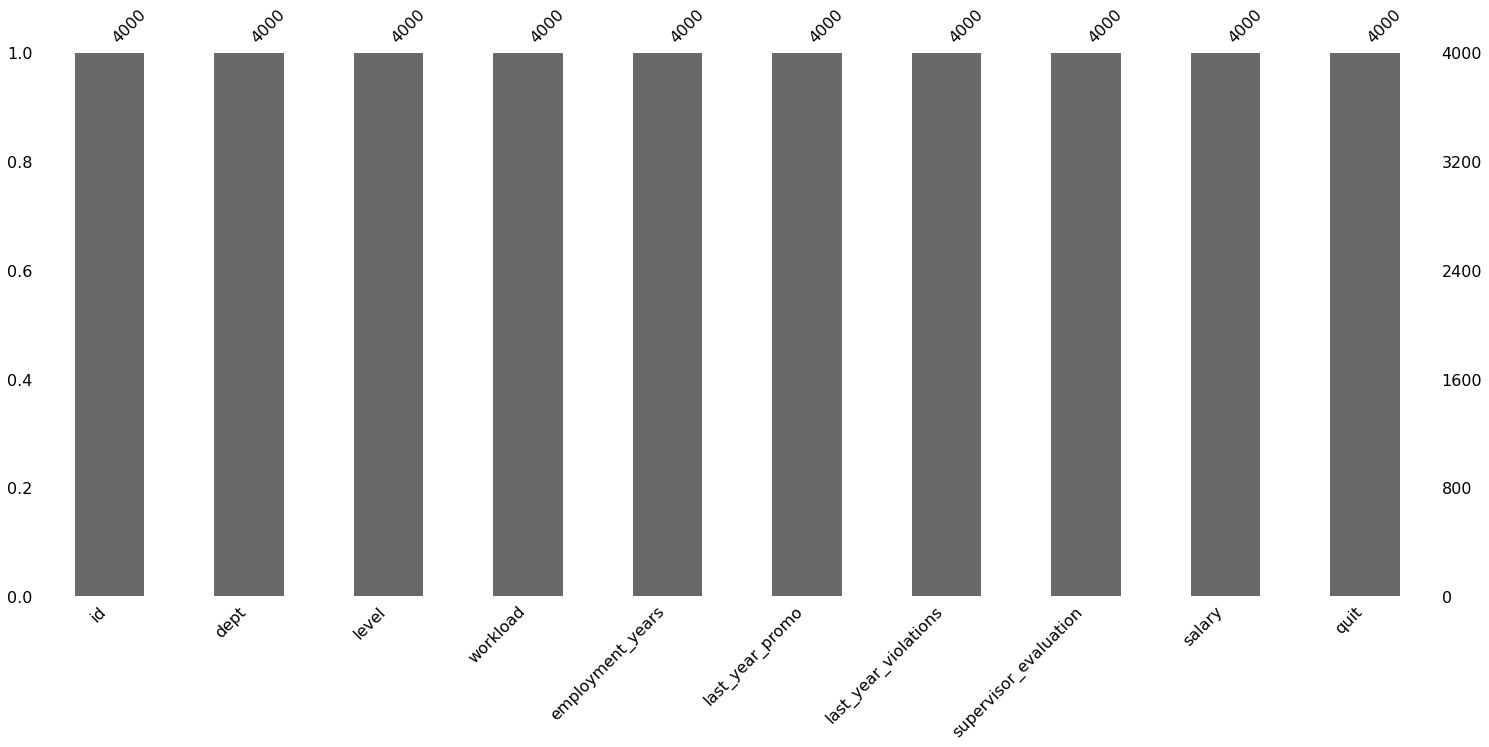

In [532]:
general_info(quit)

In [533]:
duplicates(quit)

Уникальные значения в столбце dept:  ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уникальные значения в столбце level:  ['middle' 'junior' 'sinior']
Уникальные значения в столбце workload:  ['high' 'medium' 'low']
Уникальные значения в столбце last_year_promo:  ['no' 'yes']
Уникальные значения в столбце last_year_violations:  ['no' 'yes']
Уникальные значения в столбце quit:  ['no' 'yes']


In [534]:
duplicates(X_test_class)

Уникальные значения в столбце dept:  ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уникальные значения в столбце level:  ['junior' 'middle' 'sinior' nan]
Уникальные значения в столбце workload:  ['medium' 'low' 'high' ' ']
Уникальные значения в столбце last_year_promo:  ['no' 'yes']
Уникальные значения в столбце last_year_violations:  ['no' 'yes']


**Промежуточный вывод**

В новом тренировочном датасете пропусков нет, также как и явных и неявных дубликатов.


<a id='section_id12'></a>
### Исследовательский анализ данных.

Общая информация о данных.

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
dept,4000,5,sales,1438
level,4000,3,junior,1949
workload,4000,3,medium,2118
last_year_promo,4000,2,no,3887
last_year_violations,4000,2,no,3455
quit,4000,2,no,2872




------------- Гистограммы для числовых признаков -------------


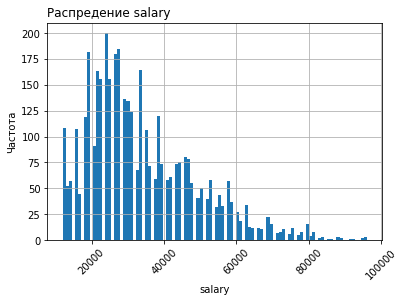

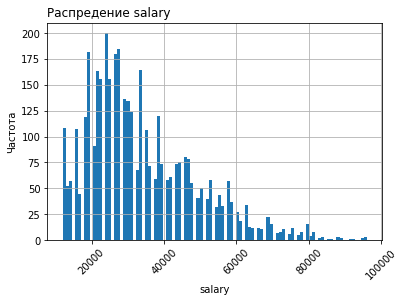



------------- Распределения категориальных признаков -------------


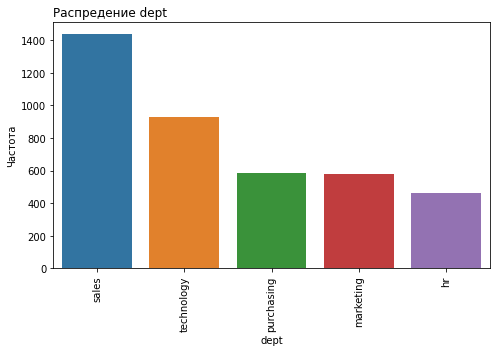

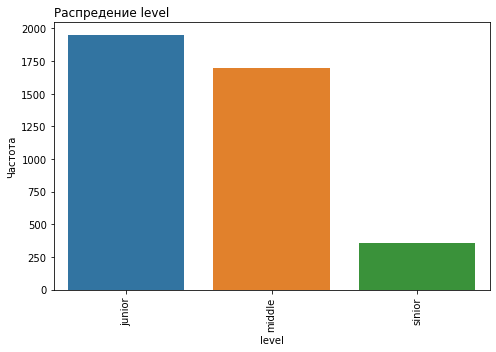

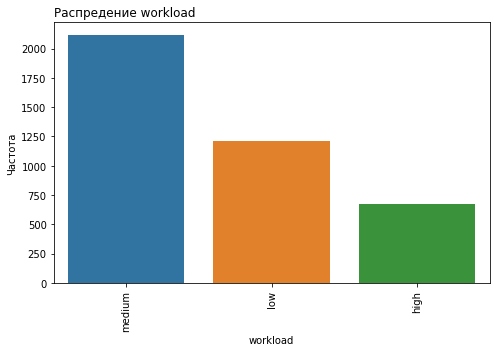

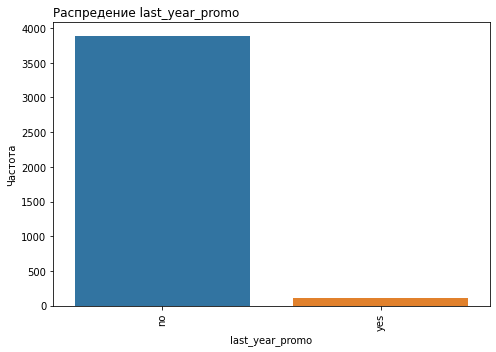

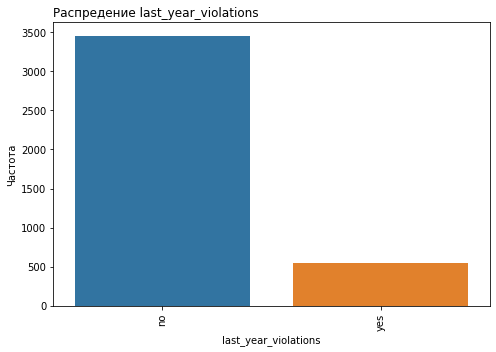

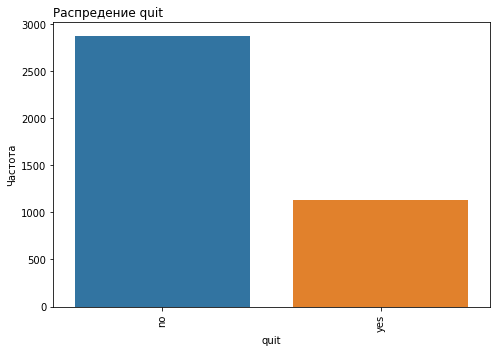

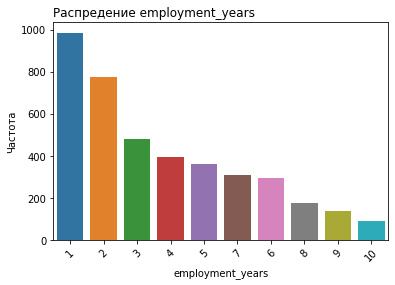

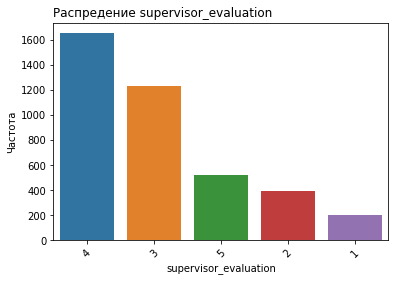

In [535]:
eda(quit)

Описательная статистика и распределения данных практически не отличаются от тренировочного датасета для первой задачи. Таргет более менее сбалансирован. Но при обучении моделей добавим параметр balanced.

Попробуем создать портрет уволившегося сотрудника. Для аккуратности и читаемости кода создадим две переменные - датасет с уволившимися и оставшимися сотрудниками.

In [536]:
quit_yes = quit[quit['quit']=='yes']

In [537]:
quit_no = quit[quit['quit']=='no']

Построим график распределения зарплаты для уволившихся и оставшихся сотрудников.

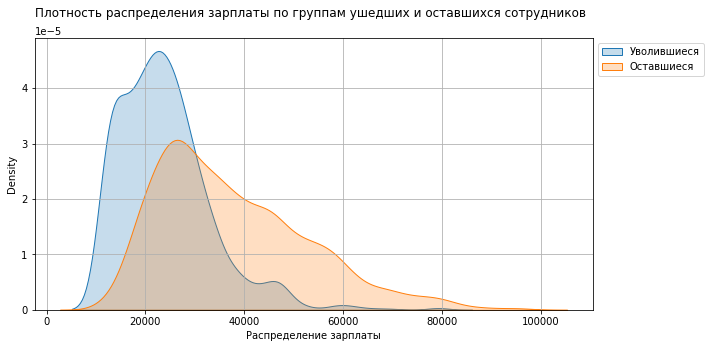

In [538]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(quit_yes.salary, label = 'Уволившиеся', fill=True)
sns.kdeplot(quit_no.salary, label = 'Оставшиеся', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения зарплаты по группам ушедших и оставшихся сотрудников\n', loc = 'left') 
plt.xlabel('Распределение зарплаты') 


plt.show()

Визуализация показывает, что у ушедших зарплата меньше, чем у лояльных сотрудников.

Создадим сводную таблицу по зарплате в зависимости от отдела.

In [539]:
quit.pivot_table(index='quit', columns='dept', values='salary', aggfunc='median').reset_index()

dept,quit,hr,marketing,purchasing,sales,technology
0,no,34800,36000,33600,33600,38400
1,yes,22200,24000,21600,20400,26400


По всем отделам у ушедших медианная зарплата гораздо ниже, чем у лояльных сотрудников. Причем самая низкая медианная зарплата в отделе продаж.

Посмотрим распределение уволившихся по отделам.

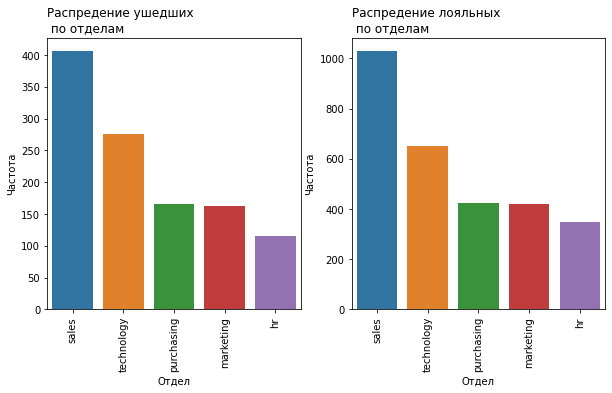

In [540]:
plt.figure(figsize=(10,5))
plt.subplot(121) 
sns.countplot(data=quit_yes, x='dept', order=quit_yes['dept'].value_counts().index)
plt.title('Распредение ушедших \n по отделам', loc = 'left') 
plt.xlabel('Отдел') 
plt.ylabel('Частота') 
plt.xticks(rotation=90)

plt.subplot(122) 
sns.countplot(data=quit_no, x='dept', order=quit_no['dept'].value_counts().index)
plt.title('Распредение лояльных \n по отделам', loc = 'left') 
plt.xlabel('Отдел') 
plt.ylabel('Частота') 
plt.xticks(rotation=90)


plt.show()


Видим, что чаще всего люди уходя из отдела продаж. Но мы помним, что этот отдел самый многочисленный в компании. Поэтому абослютные значения нерелеванты.

Расчитаем процент ушедших по всем отделам.

In [541]:
((quit_yes['dept'].value_counts())/(quit['dept'].value_counts())*100).sort_values(ascending=False)

technology    29.741379
sales         28.303199
purchasing    28.231293
marketing     28.006873
hr            25.000000
Name: dept, dtype: float64

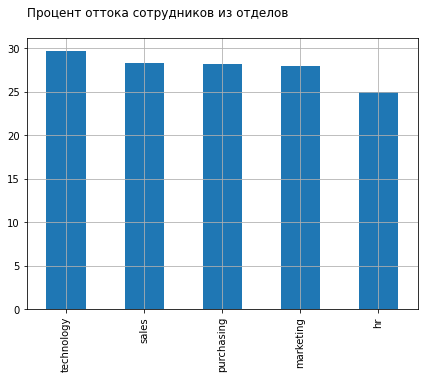

In [542]:
plt.figure(figsize=(7,5))
((quit_yes['dept'].value_counts())/(quit['dept'].value_counts())*100).sort_values(ascending=False).plot(kind='bar');
plt.title('Процент оттока сотрудников из отделов\n', loc = 'left') 
plt.grid(True)
plt.show()

В процентном соотношении чаще всего сотрудники уходят из отдела технологий и продаж.

Проверим уровень загруженности.

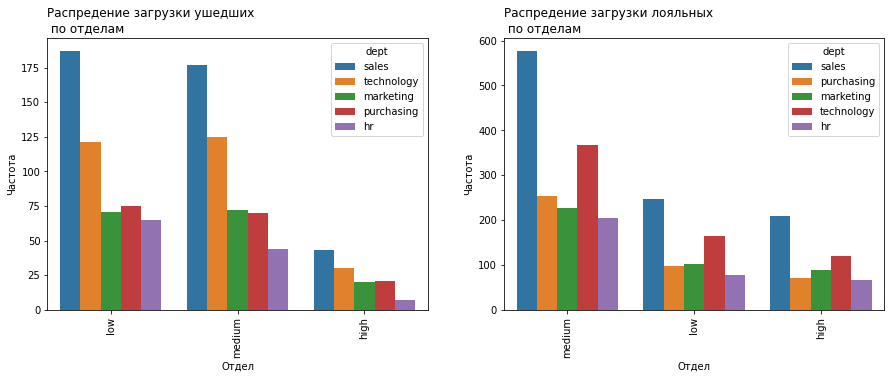

In [543]:
plt.figure(figsize=(15,5))
plt.subplot(121) 
sns.countplot(data=quit_yes, x='workload', order=quit_yes['workload'].value_counts().index, hue='dept')
plt.title('Распредение загрузки ушедших \n по отделам', loc = 'left') 
plt.xlabel('Отдел') 
plt.ylabel('Частота') 
plt.xticks(rotation=90)

plt.subplot(122) 
sns.countplot(data=quit_no, x='workload', order=quit_no['workload'].value_counts().index, hue='dept')
plt.title('Распредение загрузки лояльных \n по отделам', loc = 'left') 
plt.xlabel('Отдел') 
plt.ylabel('Частота') 
plt.xticks(rotation=90)


plt.show()


In [544]:
pd.DataFrame(quit_yes.groupby(['workload', 'dept'])['id'].count()).sort_values('id', ascending=False).reset_index()

,workload,dept,id
0,low,sales,187
1,medium,sales,177
2,medium,technology,125
3,low,technology,121
4,low,purchasing,75
5,medium,marketing,72
6,low,marketing,71
7,medium,purchasing,70
8,low,hr,65
9,medium,hr,44


Наблюдаем интересную зависимость. У ушедших преобладает низкая загрузка, и снова лидирует отдел продаж. Это может означать, что людям не давали достаточно задач и не загружали их. Причины могут быть две - низкая компетенция либо недоверие к ее уровню со стороны руководителя, неинтересные задачи. 

Но мы помним, что численность в отделах сильно отличается, поэтому посмотрим на относительные показатели.

In [545]:
pd.DataFrame((quit_yes.groupby(['workload', 'dept'])['id'].count()) / (quit.groupby(['workload', 'dept'])['id'].count())*100) \
.reset_index().sort_values('id', ascending=False)

,workload,dept,id
5,low,hr,45.454545
7,low,purchasing,43.352601
8,low,sales,43.187067
9,low,technology,42.307692
6,low,marketing,41.040462
14,medium,technology,25.354970
11,medium,marketing,24.000000
13,medium,sales,23.474801
2,high,purchasing,22.826087
12,medium,purchasing,21.671827


При выводе статистики загрузки по отделам в процентном соотношении ушедших от всех сотрудников наблюдаем, что в возглавляет антирейтинг отдел персонала, закупок и продажи на третьем месте. А мы помним из матрицы корреляций, что уровень загрузки очень сильно коррелировал с уровнем зарплаты. Визуализируем это.

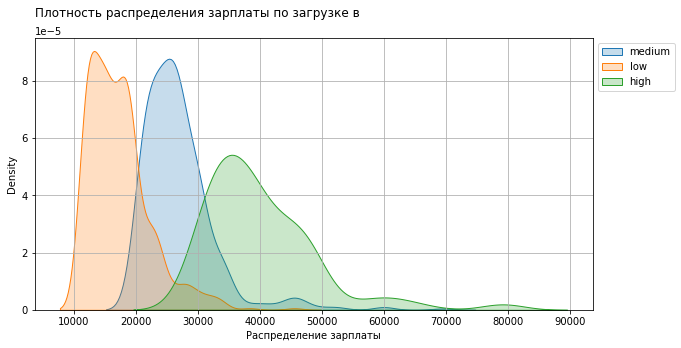

In [546]:
fig, ax = plt.subplots(figsize=(10, 5))

for i in quit_yes['workload'].unique().tolist():
    sns.kdeplot(quit_yes[quit_yes['workload']==i].salary, label=f'{i}', fill=True)
    
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения зарплаты по загрузке в \n', loc = 'left') 
plt.xlabel('Распределение зарплаты') 
plt.show()

In [547]:
quit_yes['workload'].value_counts()

low       519
medium    488
high      121
Name: workload, dtype: int64

Визуализация наглядно показывает, что больше всего ушедших сотрудников имели низкую загрузку и низкую зарплату.

Проверим уровень компетенций ушедших сотрудников.

In [548]:
quit_yes['level'].value_counts()

junior    1003
middle     108
sinior      17
Name: level, dtype: int64

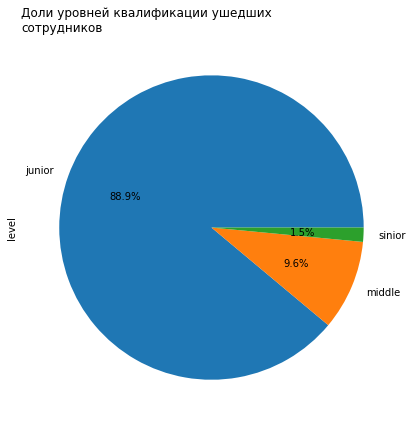

In [549]:
plt.figure(figsize=(7,7))
quit_yes['level'].value_counts().plot(kind='pie', label='level', autopct='%1.1f%%');
plt.title('Доли уровней квалификации ушедших\nсотрудников', loc = 'left') 
plt.show()

Чаще всего уходят начинающие сотрудники.

Изучим время работы в компании.

In [550]:
pd.crosstab(quit['quit'], quit['employment_years'], margins=True)

employment_years,1,2,3,4,5,6,7,8,9,10,All
quit,,,,,,,,,,,
no,386,487,316,366,339,286,301,171,133,87,2872
yes,599,290,163,27,23,10,7,3,3,3,1128
All,985,777,479,393,362,296,308,174,136,90,4000


Чаще всего сотрудники уходят на первом году работы.

In [551]:
pd.crosstab(quit['quit'], quit['supervisor_evaluation'], margins=True)

supervisor_evaluation,1,2,3,4,5,All
quit,,,,,,
no,107,227,710,1368,460,2872
yes,95,164,523,286,60,1128
All,202,391,1233,1654,520,4000


Чаше всего ушедшим давали среднюю оценку их работы (3-4 балла).

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. 

In [552]:
y_test_reg = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [553]:
sat_rate = y_test_reg.merge(y_test_class, on='id')

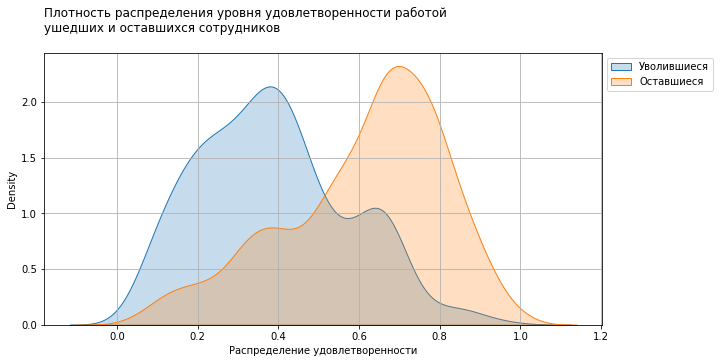

In [554]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(sat_rate[sat_rate['quit']=='yes'].job_satisfaction_rate, label = 'Уволившиеся', fill=True)
sns.kdeplot(sat_rate[sat_rate['quit']=='no'].job_satisfaction_rate, label = 'Оставшиеся', fill=True)
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения уровня удовлетворенности работой\nушедших и оставшихся сотрудников\n', loc = 'left') 
plt.xlabel('Распределение удовлетворенности') 


plt.show()

По графику мы убеждаемся в правоте аналитиков, что уровень удовлетворенности действительно влияет на вероятность увольнения сотрудника. У ушедших людей удовлетворенность работой явно ниже, чем у оставшихся.

Проведем статистический тест, чтобы убедиться наверняка.

In [555]:
# Первая группа для исследования - уровень удовлетворенности уволившихся.
first_group = sat_rate[sat_rate['quit']=='yes'].job_satisfaction_rate.dropna().sample(100)

In [556]:
# Вторая группа для исследования - уровень удовлетворенности оставшихся.
second_group = sat_rate[sat_rate['quit']=='no'].job_satisfaction_rate.dropna().sample(100)

*Нулевая гипотеза:*

средние значения удовлетворенности работой сотрудников из двух групп равны.

*Альтернативная гипотеза:*

средние значения удовлетворенности работой сотрудников из двух групп не равны.


Для проверки гипотез используем t-тест, так как соблюдаются условия для теста:

- генеральные совокупности не зависят друг от друга
- мы взяли достаточно большие выборки, чтобы применить т-тест.
- мы предполагаем, что дисперсии генеральных совокупностей равны. Мы никогда точно не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей. С другой — по умолчанию параметр equal_var принимает значение True: дисперсии считаются равными и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить. При этом если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан. Симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается.)


Уровень значимости выберем 0.05. Это общепринятое значение. 

In [557]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(first_group, second_group, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.5451512656414372e-16
Отвергаем нулевую гипотезу


Статистический тест не дал нам оснований принять нулевую гипотезу о том, что удовлетворенность уволившихся и оставшихся не отличается.

**Промежуточный вывод**

Провели исследовательский анализ нового датасета, по которому мы можем составить портрет уволившихся сотрудников:
- низкая зарплата
- работа в отделе продаж или в отделе технологий
- низкая загрузка (при этом уровень загрузки коррелирует с уровнем зарплаты). При этом в относительном соотношении с низкой загрузкой чаще всего уходят из hr отдела, но по абсолютной величине в этом отделе работает меньше всего сотрудников. 
- квалификация junior
- чаще сотрудники уходят в течение первого года работы.
- средняя оценка работы руководителем

Пришли к выводу, что уровень удовлетворенности действительно влияет на вероятность увольнения. Уволившиеся были менее удовлетворены работой.

<a id='section_id13'></a>
### Добавление нового входного признака.

В предыдущем разделе мы обнаружили зависимость уровня  удовлетворенности работой от вероятности ухода сотрудника. Такая зависимость действительно есть. Добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [558]:
quit_satisfaction_rate = quit.drop('quit', axis=1)

In [559]:
quit_satisfaction_pred = randomized_search.predict(quit_satisfaction_rate ) 

In [560]:
quit['job_satisfaction_rate'] = quit_satisfaction_pred

In [561]:
quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.605831
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.799808
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.445175
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.266279
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.799808


<a id='section_id14'></a>
### Корреляционный анализ.

Изучим взаимосвязь между признаками в тренировочном датасете, рассчитаем коэффициенты корреляции между всеми признаками.

In [562]:
# phik корреляция
interval_cols = ['salary', 'job_satisfaction_rate']

In [563]:
phik_overview = quit.phik_matrix(interval_cols=interval_cols)

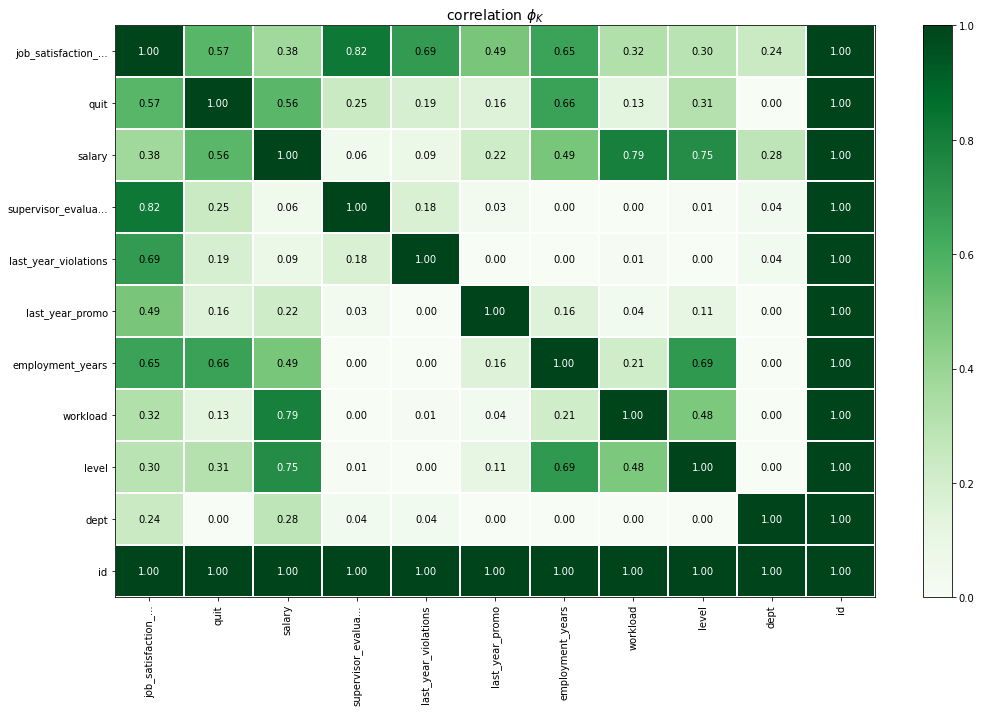

In [564]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(15, 10))

Ранее мы уже изучали корреляцию входящих признаков между собой. Сейчас на более интересует корреляция признаков с таргетом. 
Самая высокая корреляция таргета с признаком годы работы и уровень удовлетворенности работой. Аналитики не ошибались. 

<a id='section_id15'></a>
### Подготовка данных.

Разобьем тренировочную выборку на входные признаки и целевую переменную.

In [565]:
X_train_class = quit.drop(['id', 'quit'], axis=1)

In [566]:
X_train_class.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,2,no,no,4,54000,0.605831
1,sales,junior,medium,2,no,no,4,27600,0.799808
2,purchasing,middle,medium,5,no,no,1,37200,0.445175
3,sales,junior,medium,2,no,yes,3,24000,0.266279
4,marketing,junior,medium,2,no,no,5,25200,0.799808


In [567]:
X_test_class.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,salary_cat
0,485046,marketing,junior,medium,2,no,no,5,28800,middle
1,686555,hr,junior,medium,1,no,no,4,30000,middle
2,467458,sales,middle,low,5,no,no,4,19200,low
3,418655,sales,middle,low,6,no,no,4,19200,low
4,789145,hr,middle,medium,5,no,no,5,40800,middle-high


In [568]:
X_test_class = X_test_class.merge(y_test_reg, on='id')

In [569]:
X_test_class = X_test_class.drop(columns=['salary_cat', 'id'], axis=1)

In [570]:
y_train_class = quit['quit']

In [571]:
y_test_class = y_test_class['quit']

Мы не будем дополнительно делать разбивку та тренировочную и валидационную выборки, так как во входящих признаках у нас есть большой дисбаланс по некоторым переменным, и соответственно какие-то значения несбаланисрованных признаком могут отсутствовать либо в тренировочной, либо в валидационной выборке. Напротив же изначально датасет quit и X_test_class репрезентативны. При исследовательском анализе видели, что все значения несбалансированных переменных присутствуют в обоих выборках. Например, и там, и там есть небольшая доля сотрудников, кому повысили зарплаты. 

In [572]:
X_train_class.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,2,no,no,4,54000,0.605831
1,sales,junior,medium,2,no,no,4,27600,0.799808
2,purchasing,middle,medium,5,no,no,1,37200,0.445175
3,sales,junior,medium,2,no,yes,3,24000,0.266279
4,marketing,junior,medium,2,no,no,5,25200,0.799808


In [573]:
X_test_class.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,2,no,no,5,28800,0.79
1,hr,junior,medium,1,no,no,4,30000,0.72
2,sales,middle,low,5,no,no,4,19200,0.64
3,sales,middle,low,6,no,no,4,19200,0.60
4,hr,middle,medium,5,no,no,5,40800,0.75


Создадим списки для ohe, ord и scaler.

In [574]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

In [575]:
ord_columns = ['level', 'workload']

In [576]:
num_columns = X_train_class.select_dtypes(include=['number']).columns

Cоздаём пайплайны.

In [577]:
# Cоздаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование, SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# Cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование, 
# SimpleImputer + OE.
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


# Создаем пайплайн для подготовки данных к обучению.
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 


# Cоздаём итоговый пайплайн: подготовка данных и модель.
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

Закодируем целевую переменную.

In [578]:
# экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучим модель 
label_encoder.fit(y_train_class)

# трансформируем тренировочную и тестовую выборку
y_train_class = label_encoder.transform(y_train_class)
y_test_class = label_encoder.transform(y_test_class)

 **Промежуточный вывод**

Создали списки признаков для кодировщиков. Закодировали целевую переменную.

<a id='section_id16'></a>
### Обучение моделей.

Обучим как минимум три модели. Как минимум для двух из них подберем гиперпараметры. Проверим качество лучшей модели.
В качестве метрики качества выбираем метрику ROC-AUC, поскольку эта метрика универсальна для оценки качества моделей классификации. Ее можно использовать для оценки моделей с различными пороговыми значениями и для сравнения моделей с разными настройками. Интуитивно понятная интерпретация. Площадь под кривой предоставляет легко интерпретируемую метрику качества модели. Возможность показать, насколько корректно упорядочены вероятности. ROC-AUC показывает, как часто положительные объекты имеют меньшую вероятность положительности, чем негативные объекты. Значение ROC-AUC находится в диапазоне от 0 до 1, где 1 указывает на идеальную способность модели различать классы, а 0,5 — на отсутствие классификационной способности, эквивалентной случайному угадыванию.

Создаем список параметров для поиска по сетке для разных моделей.

In [579]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'models__class_weight':['balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'models__weights': ['uniform'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

   # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=42
        )],
        'models__penalty':['l1','l2','elasticnet','none'],
        'models__solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
        'models__C': range(1, 5),
        'models__class_weight':['balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     # словарь для модели SVC()
    {
        'models': [SVC(probability= True, random_state=42)],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'models__C': range(1, 5),
        'models__class_weight':['balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


Создаем объект класса случайного поиска по сетке.

In [580]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

Обучим модель.

In [581]:
randomized_search.fit(X_train_class, y_train_class)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                            'liblinear', 'sag',
                                                            'saga'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__class_weight': ['balanced'],
                                         'models__kernel': ['linear', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Выведем паметры лучшей модели, найденной по сетке.

In [582]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [583]:
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Метрика лучшей модели на тренировочной выборке: 0.9171400487009432


Проверим работу модели на тестовых значениях.

In [584]:
y_test_pred_class = randomized_search.predict_proba(X_test_class)[:, 1] 

In [585]:
print(f'Метрика ROC-AUC на кросс-валидации: {roc_auc_score(y_test_class, y_test_pred_class)}')

Метрика ROC-AUC на кросс-валидации: 0.9102572650585747


На тестовой выборке результат метрики удовлетворяет условия ТЗ заказчика.

Посмотрим на важность признаков.

In [586]:
model = randomized_search.best_estimator_.named_steps['models']

In [587]:
#применим пайплайн для кодировки входящих признаком на тренировочной и тестовой выбoрке
X_train_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(X_train_class),
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

In [588]:
X_test_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].transform(X_test_class),
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

In [589]:
#обучeние модели
model.fit(X_train_shap, y_train_class)

LogisticRegression(C=4, class_weight='balanced', penalty='l1', random_state=42,
                   solver='saga')

In [590]:
#Значения SHAP для модели черного ящика
explainer = shap.LinearExplainer(model, X_train_shap) #feature_names = data_preprocessor.get_feature_names_out())

In [591]:
shap_values = explainer(X_test_shap)

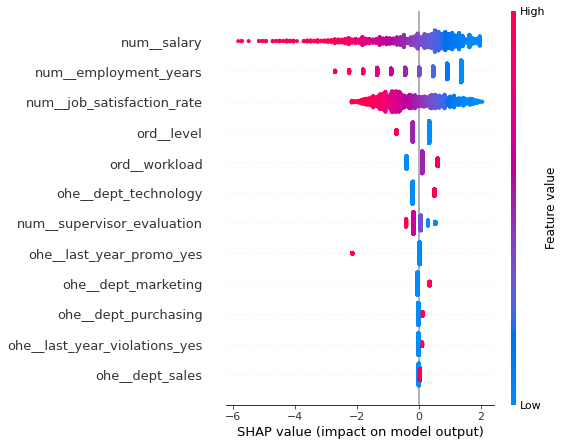

In [592]:
#суммарная оценка вклада каждого входящего признака для предсказания модели
shap.summary_plot(shap_values, X_test_shap)

Из визуализации видим, что больше всего на отток сотрудников влияет уровень зп, что интуитивно и так понятно. Чем ниже зп, тем выше отток. Вторая по важности переменная - годы работы, "долгожители" уходят реже. Третья переменная - это уровень удовлетворенности работой. Снова убеждаемся, что аналитики не ошиблись.

**Промежуточный вывод**


Обучили несколько моделей. Первая модель показала метрику, увовлетворяющую ТЗ заказчика. Применили метод shap, чтобы понять какой признак больше всего влияет на решение модели. Больше всего на отток сотрудников влияет уровень зп, что интуитивно и так понятно. Чем ниже зп, тем выше отток. Вторая по важности переменная - годы работы, "долгожители" уходят реже. Третья переменная - это уровень удовлетворенности работой. Снова убеждаемся, что аналитики не ошиблись.

<a id='section_id17'></a>
### Вывод по задаче 2.


Загрузили новый тренировочный датасет. Тестовый с входящими признаками брали из первой задачи. Упорядочили данные в таргете.

Провели исследовательский анализ нового датасета, по которому мы можем составить портрет уволившихся сотрудников:
- низкая зарплата
- работа в отделе продаж или в отделе технологий
- низкая загрузка (при этом уровень загрузки коррелирует с уровнем зарплаты). При этом в относительном соотношении с низкой загрузкой чаще всего уходят из hr отдела, но по абсолютной величине в этом отделе работает меньше всего сотрудников. 
- квалификация junior
- чаще сотрудники уходят в течение первого года работы.
- средняя оценка работы руководителем

Пришли к выводу, что уровень удовлетворенности действительно влияет на вероятность увольнения. Уволившиеся были менее удовлетворены работой.

Проверили корреляцию тергета с входящими признаками.
Самая высокая корреляция таргета с признаком годы работы и уровень удовлетворенности работой. Аналитики не ошибались. 

Создали списки признаков для кодировщиков. Закодировали целевую переменную.

Обучили несколько моделей. Первая модель показала метрику, увовлетворяющую ТЗ заказчика. Применили метод shap, чтобы понять какой признак больше всего влияет на решение модели. Больше всего на отток сотрудников влияет уровень зп, что интуитивно и так понятно. Чем ниже зп, тем выше отток. Вторая по важности переменная - годы работы, "долгожители" уходят реже. Третья переменная - это уровень удовлетворенности работой. Снова убеждаемся, что аналитики не ошиблись.

<a id='section_id18'></a>
## Общий вывод.

**Вывод по первой задаче**

Для изучения получили три датасета, необходимых для построения модели машинного обучения. Посмотрели на структуру данных, убедились, что названия столбцов соответствуют общепринятым стандартам. Данные были не упорядочены по id. Упорядочили данные по id для корректных подсчетов метрики моделями.


Изучили общую информацию о каждом датасете, проверели пропуски и дубликаты. Были обнаружены пропуски в тренировочном и тестовом (входящие признаки) датасетах. Было принято решение в тренировочной выборке заполнить пропуски наиболее часто встречающимися значениями на этапе подготовки данных к обучению модели с помощью пайплайна. В тестовой же выборке было пять пропусков, три явных и два неявных. Поскольку тестовая выборка довольно большая и для тестирования мы хотим иметь реальный полный набор данных, то мы приняли решение эти данные отбросить.

Провели исследовательский аналих представленных датасетов.

При исследовательском анализе всех представленных датасетов увидели:
- чаще всего люди работают в компании всего год-два. Но есть также сотрудники, которые работаю долго 8-10 лет.
- чаще всего руководитель оценивает работу своих сотрудников хорошо, но тем не менее 25% работают на тройку.
- распределение по зарплате имеет длинный хвост вправо, что является нормальным, так как это зарплаты руководства. Медианная зарплата 33926.70 рублей.
- распределение уровня удовлетворенности работой имеет два пика, медианна 0.53.
- больше всего сотрудников трудится в отделе продаж.
- преобладаюст молодые начинающие сотрудники.
- больше всего сотрудников со средней загрузкой по работе.
- зарплату в прошлом году практически никому не повысили.
- сотрудники чаще не нарушают условия трудового договора.

Заметили, что есть большой дисбаланс по некоторым входящим признакам, например, у признака повышение зарплаты в прошлом году. 

В данных есть числовые и категориальные переменные. Категориальные переменные в свою очередь могут быть разбиты на два типа - ранговые для ord кодирования и обычные для ohe кодирования. 

Численные признаки не имеют линейной зависимости от таргета. 


Построили матрицу корреляций признаков, из которой увидели, что больше всего коррелируют между собой уровень загрузки и зарплата. Но поскольку о мультиколлинеарности говорят при значении коэффициента по модулю от 0.9 до 0.95, то в нашем случае коэффициентов корреляции выше 0.9 не наблюдается. 

Целевая переменная - это удовлетворенность работой. Больше всего с ней коррелирует оценка работы руководителем и были ли нарушения трудового договора в прошлом году.

Создали списки признаков для кодировщиков. Подготовили data preprocessor. Перед поиском по сетке создали свою пользовательскую метрику.

Для выбора лучшей модели была создана пользовательская метрика smape. Эта метрика позволяет корректно работать с предсказанными значениями, независимо от того, больше они фактического значения или меньше. SMAPE уменьшает чувствительность к малым значениям, используя среднее значение истинного и прогнозируемого значений в знаменателе.
Справедливость оценки. SMAPE обеспечивает более симметричный взгляд на ошибки, учитывая, что и переоценка, и недооценка одинаково влияют на конечный результат. SMAPE помогает определить, насколько близки модели прогнозирования к фактическим результатам данных. Например, значение 2% означает, что разница между методами прогнозирования и полученными реальными данными относительно невелика. Высокий показатель SMAPE, например 53%, означает, что можно улучшить модели прогнозирования, чтобы сделать их более точными.


Затем был создан список словарей параметров для модели дерево решений и эластичной линейной регрессии, которая включает в себя и ридж и лассо (для это модели создали список l1_ration, чтобы регулировать соотношение между штрафами ридж и лассо). Выбор дерева решений - простота интерпретации работы модели, возможность вводить многие гиперпараметры для регуляризации работы. Выбор эластичной модели линейной регрессии - модель совмещает в себе для вида регуляризации, причем лассо может веса неважных признаков обнулить и не использовать их. Это может упростить модель и улучшить производительность. 

Для поиска лучше модели использовали случайный поиск для ускорения поиска лучшей модели во избежание перебора всех возможных комбинаций параметров. Лучшая модель по метрике smape показала 17,82% на тестовой выборке. Тогда было решене применить feature engineering. Произвели сегментирование зарплаты. Затем заново обучили модель на новых входных признаках, но качество модели не улучшилось. Возможно входящих признаков не достаточно для того, чтобы модель уловила зависимости, либо же оценка удовлетворенности производится по совершенно субъективным мнениям сотрудников, либо для данных не подходят линейные модели и следует искать какой-то другой алгоритм.


**Вывод по второй задаче**

Загрузили новый тренировочный датасет. Тестовый с входящими признаками брали из первой задачи.  Упорядочили данные в таргете.

Провели исследовательский анализ нового датасета, по которому мы можем составить портрет уволившихся сотрудников:
- низкая зарплата
- работа в отделе продаж или в отделе технологий
- низкая загрузка (при этом уровень загрузки коррелирует с уровнем зарплаты). При этом в относительном соотношении с низкой загрузкой чаще всего уходят из hr отдела, но по абсолютной величине в этом отделе работает меньше всего сотрудников. 
- квалификация junior
- чаще сотрудники уходят в течение первого года работы.
- средняя оценка работы руководителем

Пришли к выводу, что уровень удовлетворенности действительно влияет на вероятность увольнения. Уволившиеся были менее удовлетворены работой.

Проверили корреляцию тергета с входящими признаками.
Самая высокая корреляция таргета с признаком годы работы и уровень удовлетворенности работой. Аналитики не ошибались. 

Создали списки признаков для кодировщиков. Закодировали целевую переменную.

Обучили несколько моделей. Первая модель показала метрику, увовлетворяющую ТЗ заказчика. Применили метод shap, чтобы понять какой признак больше всего влияет на решение модели. Больше всего на отток сотрудников влияет уровень зп, что интуитивно и так понятно. Чем ниже зп, тем выше отток. Вторая по важности переменная - годы работы, "долгожители" уходят реже. Третья переменная - это уровень удовлетворенности работой. Снова убеждаемся, что аналитики не ошиблись.


**Рекомендации для бизнеса**

По результатам исследования пришли к выводу, что в компании самый большой отток из отдела продаж. В основном там работают начинающие сотрудники. Начинающие имеют низкую загрузку и соответственно низкую зарплату. Логично, что при низкой загрузке, зп тоже низкая. Но следует отдельно понять, почему подавляющее большинство новичков имеют низкую загрузку. Либо компания привлекает слишком много сотрудников, либо нужно улучшить систему интеграции сотрудников без опыта в компанию, предусмотреть системы тренингов и мотиваций, пересмотреть систему оплаты для начинающих. Также следует пересмотреть систему оценки работы новичков руководителями, проработать программы обучения сотрудников в связке с руководителем, чтобы ценности и параметры хорошей работы и результатов были понятны обоим сторонам. Возможно есть проблемы в коммуникациях между руководителямти и сотрудниками.